In [2]:
import pandas as pd

# Load the dataset
file_path = "D:/Lesson_Term2_Y3/Fundamental_Of_Data_Science/Final/Dataset/US_Highschool_Student_data.csv"
df = pd.read_csv(file_path)

# Display basic info and the first few rows
df_info = df.info()
df_head = df.head()

df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sex                   5400 non-null   object 
 1   Age                   5400 non-null   int64  
 2   Name                  5400 non-null   object 
 3   State                 5400 non-null   object 
 4   Address               5400 non-null   object 
 5   Famsize               5400 non-null   object 
 6   Pstatus               5400 non-null   object 
 7   Medu                  5400 non-null   object 
 8   Fedu                  5400 non-null   object 
 9   Mjob                  5400 non-null   object 
 10  Fjob                  5400 non-null   object 
 11  Guardian              5400 non-null   object 
 12  Math_Score            4961 non-null   float64
 13  Reading_Score         4970 non-null   float64
 14  Writing_Score         4963 non-null   float64
 15  Attendance_Rate      

(None,
       Sex  Age             Name       State Address Famsize Pstatus      Medu  \
 0  Female   15   Isabella Smith        Utah   Urban     LE3       A   College   
 1    Male   15      James Brown     Arizona   Rural     LE3       T  Graduate   
 2  Female   15  Olivia Williams        Utah   Rural     LE3       T  Graduate   
 3  Female   16     Amelia Jones        Utah   Rural     LE3       T  Graduate   
 4    Male   16   Logan Williams  California   Rural     GT3       T  Graduate   
 
        Fedu     Mjob  ... Reading_Score Writing_Score  Attendance_Rate  \
 0   College   Health  ...          50.0          50.0             60.0   
 1  Graduate  At_home  ...          70.0          70.0             70.0   
 2  Graduate  Teacher  ...          70.0          70.0             80.0   
 3  Graduate   Health  ...          60.0          60.0             80.0   
 4  Graduate  At_home  ...          70.0          70.0             80.0   
 
    Suspensions  Expulsions  Teacher_Support  C

In [3]:
# Drop unnecessary columns
df_cleaned = df.drop(columns=["Name", "Address"])

# Display updated columns
df_cleaned.columns


Index(['Sex', 'Age', 'State', 'Famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
       'Fjob', 'Guardian', 'Math_Score', 'Reading_Score', 'Writing_Score',
       'Attendance_Rate', 'Suspensions', 'Expulsions', 'Teacher_Support',
       'Counseling', 'Social_Worker_Visits', 'Parental_Involvement', 'GPA'],
      dtype='object')

In [4]:
# 1. Count missing values in each column
missing_values = df_cleaned.isnull().sum()

# 2. Check data types
data_types = df_cleaned.dtypes

# 3. Get unique values for categorical columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
unique_values = {col: df_cleaned[col].unique() for col in categorical_columns}

missing_values, data_types, unique_values


(Sex                       0
 Age                       0
 State                     0
 Famsize                   0
 Pstatus                   0
 Medu                      0
 Fedu                      0
 Mjob                      0
 Fjob                      0
 Guardian                  0
 Math_Score              439
 Reading_Score           430
 Writing_Score           437
 Attendance_Rate          69
 Suspensions               0
 Expulsions              318
 Teacher_Support           0
 Counseling                0
 Social_Worker_Visits      0
 Parental_Involvement      0
 GPA                     698
 dtype: int64,
 Sex                      object
 Age                       int64
 State                    object
 Famsize                  object
 Pstatus                  object
 Medu                     object
 Fedu                     object
 Mjob                     object
 Fjob                     object
 Guardian                 object
 Math_Score              float64
 Reading_Scor

In [5]:
# Function to standardize "Teacher_Support" values
def clean_teacher_support(value):
    if str(value).isdigit():  # Convert numbers to categories
        value = int(value)
        if value in [1, 2, 3]:
            return "Low"
        elif value in [4, 5]:
            return "Medium"
        elif value == 6:
            return "High"
    return value  # Keep original "Low", "Medium", "High"

# Apply cleaning function
df_cleaned["Teacher_Support"] = df_cleaned["Teacher_Support"].apply(clean_teacher_support)

# Check unique values again
df_cleaned["Teacher_Support"].unique()


array(['Low', 'Medium', 'High'], dtype=object)

In [6]:
# Function to standardize "Teacher_Support" values
def clean_teacher_support(value):
    if str(value).isdigit():  # Convert numbers to categories
        value = int(value)
        if value in [1, 2, 3]:
            return "Low"
        elif value in [4, 5]:
            return "Medium"
        elif value == 6:
            return "High"
    return value  # Keep original "Low", "Medium", "High"

# Apply cleaning function
df_cleaned["Teacher_Support"] = df_cleaned["Teacher_Support"].apply(clean_teacher_support)

# Check unique values again
print(df_cleaned["Teacher_Support"].unique())


['Low' 'Medium' 'High']


In [7]:
# Fill missing numerical values with median
numerical_columns = ["Math_Score", "Reading_Score", "Writing_Score", "GPA", "Attendance_Rate", "Expulsions"]
df_cleaned[numerical_columns] = df_cleaned[numerical_columns].fillna(df_cleaned[numerical_columns].median())

# Check if any missing values remain
print(df_cleaned.isnull().sum())


Sex                     0
Age                     0
State                   0
Famsize                 0
Pstatus                 0
Medu                    0
Fedu                    0
Mjob                    0
Fjob                    0
Guardian                0
Math_Score              0
Reading_Score           0
Writing_Score           0
Attendance_Rate         0
Suspensions             0
Expulsions              0
Teacher_Support         0
Counseling              0
Social_Worker_Visits    0
Parental_Involvement    0
GPA                     0
dtype: int64


In [8]:
# Define dropout condition
df_cleaned["Dropout"] = ((df_cleaned["GPA"] < 2.0) | 
                          (df_cleaned["Attendance_Rate"] < 60) | 
                          (df_cleaned["Expulsions"] > 0)).astype(int)

# Check dropout distribution
print(df_cleaned["Dropout"].value_counts())


Dropout
0    4869
1     531
Name: count, dtype: int64


Dropout                 1.000000
Social_Worker_Visits    0.823209
Expulsions              0.574166
Suspensions             0.181465
Fjob                    0.027176
Guardian                0.021763
Pstatus                 0.020340
State                   0.011398
Sex                     0.011348
Counseling             -0.001642
Famsize                -0.005148
Mjob                   -0.006137
Age                    -0.009965
Teacher_Support        -0.024743
Parental_Involvement   -0.025893
GPA                    -0.398484
Writing_Score          -0.444345
Reading_Score          -0.449019
Math_Score             -0.456950
Attendance_Rate        -0.537716
Medu                   -0.566925
Fedu                   -0.566925
Name: Dropout, dtype: float64


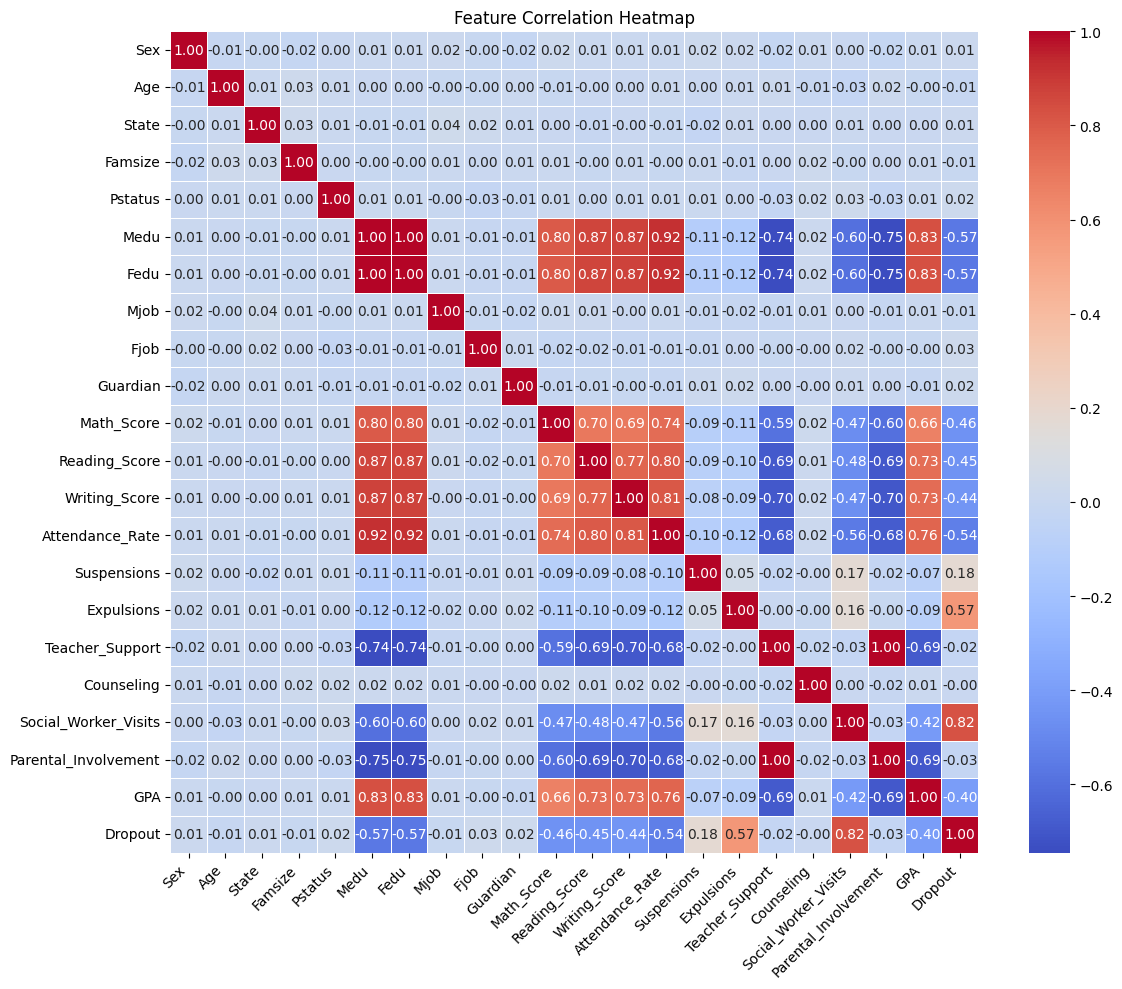

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# Ensure only numeric columns are used for correlation
def compute_correlation_matrix(df, target_column):
    # Identify categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    # Create a copy to avoid modifying original data
    df_encoded = df.copy()

    # Encode all categorical columns
    label_encoder = LabelEncoder()
    for col in categorical_cols:
        df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

    # Compute correlation matrix
    correlation_matrix = df_encoded.corr()

    # Sort features by correlation with the target column
    target_correlation = correlation_matrix[target_column].sort_values(ascending=False)
    return correlation_matrix, target_correlation

# Example usage
correlation_matrix, dropout_correlation = compute_correlation_matrix(df_cleaned, "Dropout")
print(dropout_correlation)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# from sklearn.preprocessing import LabelEncoder

# Encode categorical features
categorical_cols = ["Sex", "State", "Famsize", "Pstatus", "Medu", "Fedu", 
                    "Mjob", "Fjob", "Guardian", "Teacher_Support", 
                    "Counseling", "Parental_Involvement"]
encoder = LabelEncoder()
for col in categorical_cols:
    df_cleaned[col] = encoder.fit_transform(df_cleaned[col])

# Define features (X) and target variable (y)
X = df_cleaned.drop(columns=["Dropout"])
y = df_cleaned["Dropout"]

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


Model Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       973
           1       0.98      1.00      0.99       107

    accuracy                           1.00      1080
   macro avg       0.99      1.00      0.99      1080
weighted avg       1.00      1.00      1.00      1080



Top Important Features:
 Expulsions              0.351923
Fedu                    0.143449
Social_Worker_Visits    0.095396
Medu                    0.089707
Writing_Score           0.064961
Attendance_Rate         0.062981
Reading_Score           0.061981
GPA                     0.046110
Math_Score              0.045580
Suspensions             0.013630
Parental_Involvement    0.006676
State                   0.002770
Fjob                    0.002734
Mjob                    0.002485
Age                     0.002322
Guardian                0.001823
Counseling              0.001660
Sex                     0.001180
Teacher_Support         0.000975
Famsize                 0.000880
Pstatus                 0.000778
dtype: float64


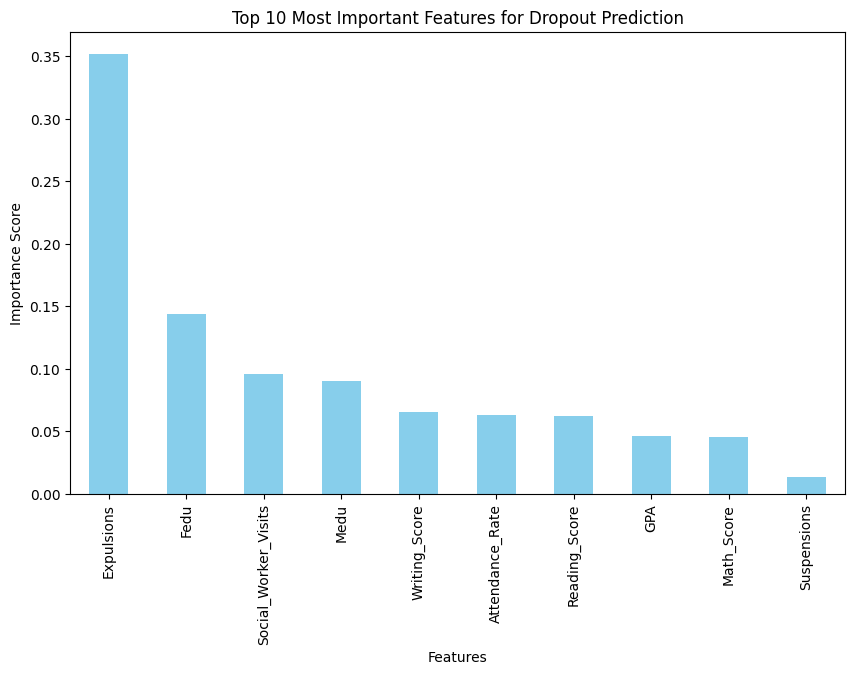

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display top features
print("Top Important Features:\n", feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importance.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Important Features for Dropout Prediction")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


In [12]:
# Use the new model to predict dropout for a new student
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Drop low-importance features
drop_cols = ["State", "Fjob", "Mjob", "Age", "Guardian", "Counseling", "Sex", "Teacher_Support", "Famsize", "Pstatus"]
X_optimized = df_cleaned.drop(columns=["Dropout"] + drop_cols)
y = df_cleaned["Dropout"]

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_optimized, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate Model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

print(f"XGBoost Model Accuracy: {accuracy_xgb:.2f}")
print("Classification Report:\n", report_xgb)


XGBoost Model Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       973
           1       1.00      1.00      1.00       107

    accuracy                           1.00      1080
   macro avg       1.00      1.00      1.00      1080
weighted avg       1.00      1.00      1.00      1080



In [ ]:
import numpy as np

# Compute correlation again
correlation_matrix = df_cleaned.corr()

# Find features with extremely high correlation (close to 1 or -1) with Dropout
high_corr_features = correlation_matrix["Dropout"].abs().sort_values(ascending=False)
print("High Correlation Features with Dropout:\n", high_corr_features)


In [ ]:
# Check the number of unique values in each feature
print(df_cleaned.nunique())

# If any feature has very few unique values and is highly correlated with Dropout, it's suspicious.


In [ ]:
# Drop the highly correlated feature
df_fixed = df_cleaned.drop(columns=["Social_Worker_Visits"])

# Define new features and target
X_fixed = df_fixed.drop(columns=["Dropout"])
y_fixed = df_fixed["Dropout"]

# Split Data Again (80% training, 20% testing)
X_train_fixed, X_test_fixed, y_train_fixed, y_test_fixed = train_test_split(X_fixed, y_fixed, test_size=0.2, random_state=42)

# Retrain XGBoost Model
xgb_model_fixed = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model_fixed.fit(X_train_fixed, y_train_fixed)

# Predict Again
y_pred_fixed = xgb_model_fixed.predict(X_test_fixed)

# Evaluate Again
accuracy_fixed = accuracy_score(y_test_fixed, y_pred_fixed)
report_fixed = classification_report(y_test_fixed, y_pred_fixed)

print(f"Fixed XGBoost Model Accuracy: {accuracy_fixed:.2f}")
print("Updated Classification Report:\n", report_fixed)
